In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

100%|██████████| 62.6M/62.6M [00:00<00:00, 72.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
#from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
df = pd.read_csv('/content/drive/MyDrive/sign_mnist_train.csv')
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data(path):
	df = pd.read_csv(path)
	y = np.array([label if label < 9
				else label-1 for label in df['label']])
	df = df.drop('label', axis=1)
	x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
				for i in range(len(df))]).astype(float)
	x = np.expand_dims(x, axis=3)
	y = pd.get_dummies(y).values

	return x, y

X_train, Y_train = load_data('/content/drive/MyDrive/sign_mnist_train.csv')
X_test, Y_test = load_data('/content/drive/MyDrive/sign_mnist_test.csv')
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)



(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(25, activation = "softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           6,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 891,385 (3.40 MB)

 Trainable params: 891,385 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 5
batch_size = 64
history = model.fit(X_train, Y_train,
                                 batch_size=batch_size,
                                 epochs = epochs,
                                 validation_data = (X_test, Y_test))


Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 24), output.shape=(None, 25)

In [ ]:
print("Training accuracy history:", history.history['accuracy'])
print("Validation accuracy history:", history.history['val_accuracy'])


Training accuracy history: [0.9279912710189819, 0.9997814893722534, 1.0, 0.983099639415741, 0.9995265007019043]
Validation accuracy history: [0.9189904928207397, 0.9403234720230103, 0.9438092708587646, 0.8283603191375732, 0.9136921167373657]


In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)
datagen.fit(X_train)

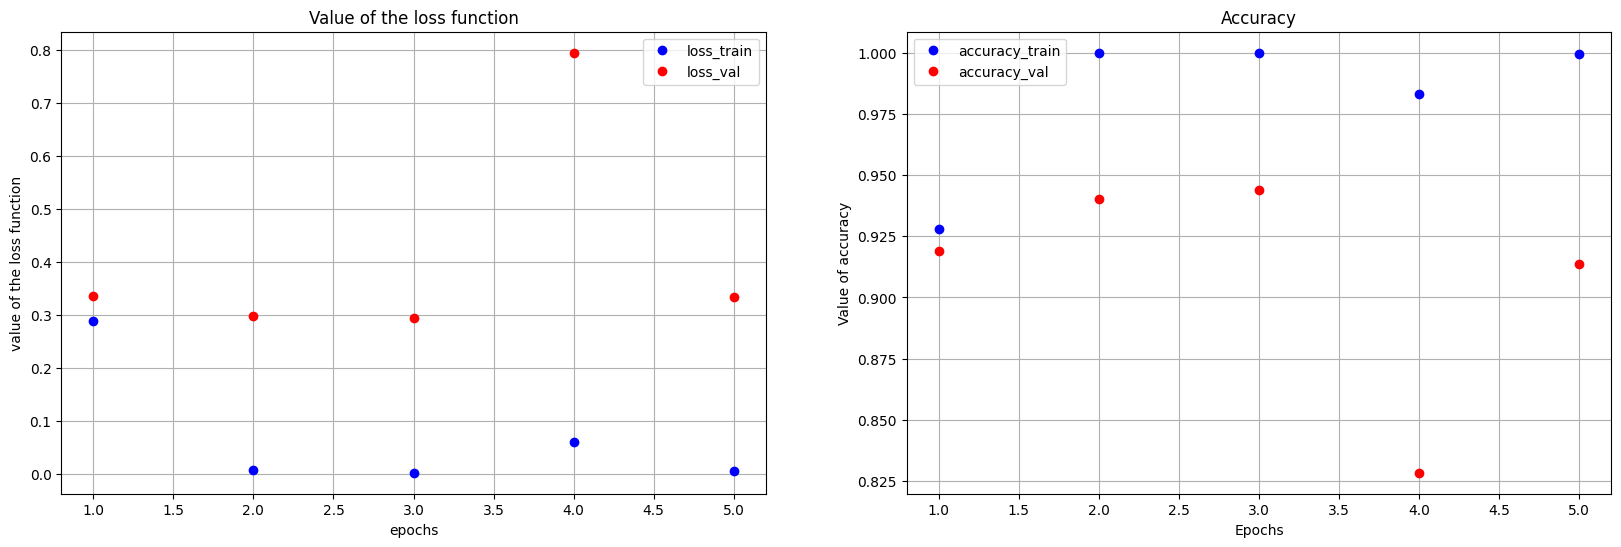

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
axs[0].plot(epochs, loss, 'bo', label='loss_train')
axs[0].plot(epochs, loss_val, 'ro', label='loss_val')
axs[0].set_title('Value of the loss function')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('value of the loss function')
axs[0].legend()
axs[0].grid()
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'bo', label='accuracy_train')
axs[1].plot(epochs, acc_val, 'ro', label='accuracy_val')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Value of accuracy')
axs[1].legend()
axs[1].grid()
plt.show()

In [ ]:
y_pred = model.predict(X_test)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


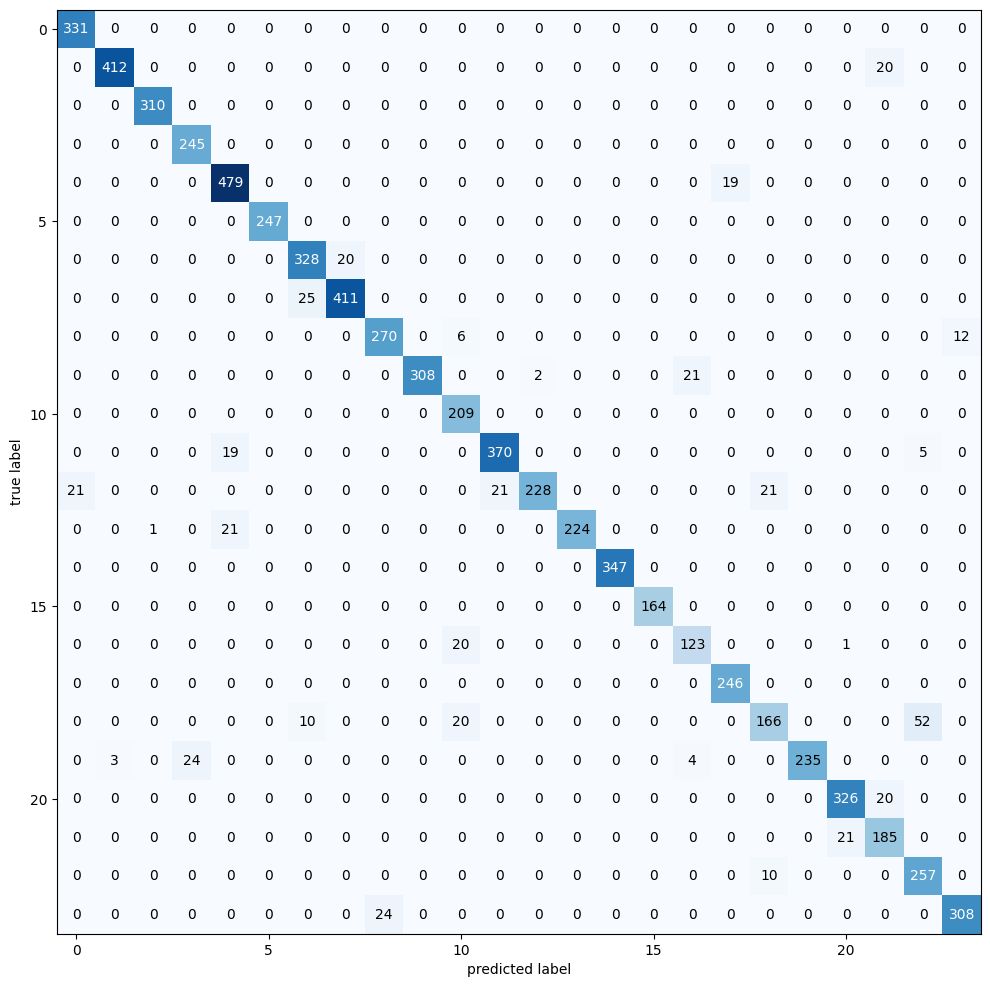

In [ ]:
conf_mat = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=False,
                                show_absolute=True,
                                figsize=(12, 12))
fig.show()

In [ ]:
print("Test accuracy:",acc_val)

Test accuracy: [0.9189904928207397, 0.9403234720230103, 0.9438092708587646, 0.8283603191375732, 0.9136921167373657]


In [ ]:
print("Train accuracy:",acc)

 accuracy: [0.9279912710189819, 0.9997814893722534, 1.0, 0.983099639415741, 0.9995265007019043]
